# Bank of Canada Monetary and Markets Statistics

* This notebook provides examples of some of the monetary policy and financial market statistics provided by the Bank of Canada. It pulls the data into dataframes that can be used for further data transformation and analysis.

* The notebook uses the data available as CSV files from the Bank of Canada website and can be further enhanced by integrating with the Bank of Canada APIs (https://www.bankofcanada.ca/valet/docs#valet_api) and other data providers such as Bloomberg Professional Services. 

* The notebook is using the following CSV files from the BoC website:
    - **Canadian Overnight Repo Rate Average (CORRA):** CORRA.csv - updated every day at 9:00 am at https://www.bankofcanada.ca/rates/interest-rates/corra/
    - **Securities Repo Operations:** Sec_Repo.csv - updated every day at 10:15 am at https://www.bankofcanada.ca/markets/market-operations-liquidity-provision/market-operations-programs-and-facilities/securities-repo-operations/
    - **Money Market Yields:** money_market.csv - updated daily at https://www.bankofcanada.ca/rates/interest-rates/money-market-yields/
    - **Selected Bond Yields:** bond_yields_all.csv - updated daily at https://www.bankofcanada.ca/rates/interest-rates/canadian-bonds/
    - **Daily Exchange Rates:** FX_RATES_DAILY-sd-2017-01-03.csv - updated daily at https://www.bankofcanada.ca/rates/exchange/daily-exchange-rates/  
        
        
* For this notebook to work, the above files must be downloaded and saved as CSV (Comma delimited) (*.csv) files in the same folder as this notebook.     
* To refresh the data, click on each of the above links, locate "Data available as: CSV, JSON and XML", right click on "CSV" and save the file without changing its name in the same location as this notebook.


## Import Dependencies

In [211]:
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Canadian Overnight Repo Rate Average (CORRA)

### Import Data

In [212]:
corra_raw=pd.read_csv(Path("CORRA.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 27)
corra_df=corra_raw.copy().dropna()

In [213]:
corra=pd.DataFrame()
corra['Corra']=corra_df['AVG.INTWO']
corra['Total Volume']=corra_df['CORRA_TOTAL_VOLUME']
corra['Trimmed Volume']=corra_df['CORRA_TRIMMED_VOLUME']
corra['Number of Submitters']=corra_df['CORRA_NUMBER_OF_SUBMITTERS']
corra['Rate at Trim']=corra_df['CORRA_RATE_AT_TRIM']
corra['Rate at 5% Perc']=corra_df['CORRA_RATE_AT_PERCENTILE_5']
corra['Rate at 25% Perc']=corra_df['CORRA_RATE_AT_PERCENTILE_25']
corra['Rate at 75% Perc']=corra_df['CORRA_RATE_AT_PERCENTILE_75']
corra['Rate at 95% Perc']=corra_df['CORRA_RATE_AT_PERCENTILE_95']
corra.index = pd.to_datetime(corra.index, format = '%m/%d/%Y')
corra.tail()

,Corra,Total Volume,Trimmed Volume,Number of Submitters,Rate at Trim,Rate at 5% Perc,Rate at 25% Perc,Rate at 75% Perc,Rate at 95% Perc
date,,,,,,,,,
2021-07-08,0.20,1.545484e+10,1.159113e+10,14.0,0.17,0.17,0.18,0.20,0.21
2021-07-09,0.18,1.576808e+10,1.182606e+10,12.0,0.15,0.16,0.18,0.19,0.20
2021-07-12,0.19,1.533197e+10,1.149897e+10,13.0,0.18,0.18,0.18,0.20,0.25
2021-07-13,0.19,1.998981e+10,1.499236e+10,13.0,0.15,0.15,0.18,0.20,0.23
2021-07-14,0.20,1.635268e+10,1.226451e+10,13.0,0.17,0.18,0.18,0.20,0.22


### CORRA

In [214]:
corra_rates=corra.drop(columns=['Total Volume','Trimmed Volume','Number of Submitters'])

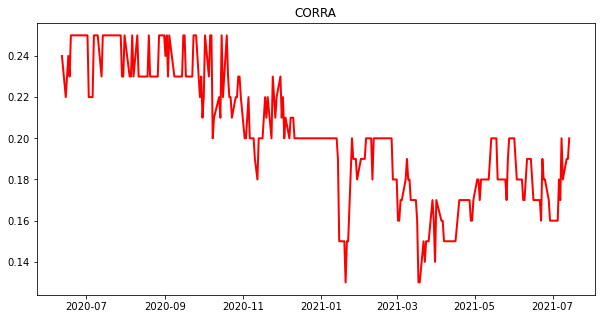

In [215]:
plt.figure(figsize=(10,5))
ax = plt.axes()

plt.plot(corra_rates['Corra'], linewidth = 2, color='red')
plt.title('CORRA')
plt.show()

### CORRA and Rates at Different Percentiles

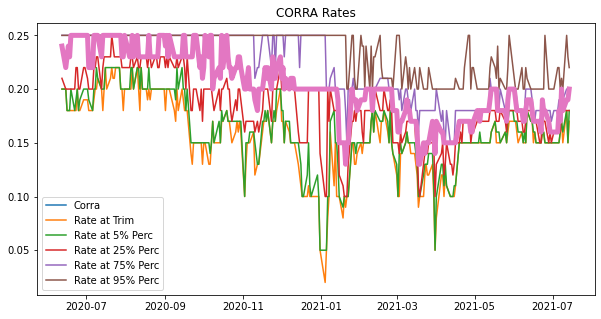

In [216]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(corra_rates)
plt.plot(corra_rates['Corra'], linewidth = 5)
plt.title('CORRA Rates')
plt.legend(corra_rates)
plt.show()

### CORRA Total and Trimmed Volumes

In [217]:
corra_volume=corra.drop(columns=['Corra','Number of Submitters','Rate at Trim','Rate at 5% Perc','Rate at 25% Perc','Rate at 75% Perc',
                                 'Rate at 95% Perc'])
corra_volume.tail()

,Total Volume,Trimmed Volume
date,,
2021-07-08,1.545484e+10,1.159113e+10
2021-07-09,1.576808e+10,1.182606e+10
2021-07-12,1.533197e+10,1.149897e+10
2021-07-13,1.998981e+10,1.499236e+10
2021-07-14,1.635268e+10,1.226451e+10


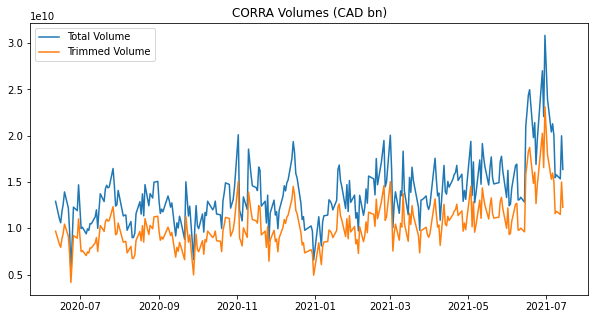

In [218]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(corra_volume)
plt.title('CORRA Volumes (CAD bn)')
plt.legend(corra_volume)
plt.show()

### Number of Submitters to CORRA

In [219]:
corra_n_sub=corra['Number of Submitters']

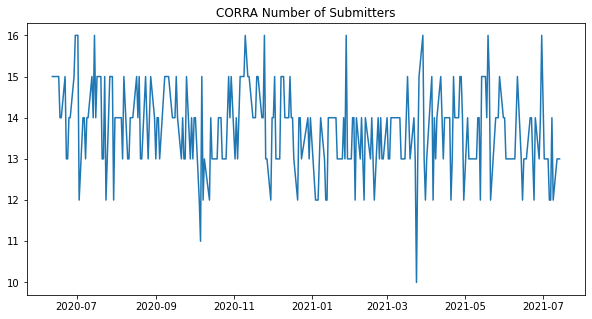

In [220]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(corra_n_sub)
plt.title('CORRA Number of Submitters')
plt.show()

# 2. Securities Repo Operations (SRO)

### Import Data

In [221]:
sro_df=pd.read_csv(Path("Sec_Repo.csv"), index_col = "SR_OPERATION_DATE", infer_datetime_format=True, parse_dates=True, skiprows = 29)

### SRO Amount

In [222]:
sro_new = sro_df.drop(columns=['sr_id', 'SR_MATURITY_DATE',
                              'SR_ALLOCATED_AMOUNT',
                              'SR_SEC_MATURITY_DATE',
                              'SR_ISIN',
                              'SR_COUPON_RATE',
                              'SR_LOW_REPO_RATE',
                              'SR_AVG_REPO_RATE',
                              'SR_HIGH_REPO_RATE',
                              'SR_SECURITY_TYPE',
                              'SR_MAX_REPO_RATE']).dropna().sort_values(by='SR_OPERATION_DATE', ascending=True).reset_index()

sro=sro_new.rename(columns={'SR_OPERATION_DATE': 'Date', 
                            'SR_OFFERED_AMOUNT': 'Amount Offered', 
                            'SR_TOTAL_ALLOCATED_AMOUNT': 'Amount Allocated'}).set_index('Date')
sro.tail()

,Amount Offered,Amount Allocated
Date,,
2021-07-09,44000.0,25841.0
2021-07-12,44000.0,27906.0
2021-07-13,44000.0,28314.0
2021-07-14,44000.0,27055.0
2021-07-15,44000.0,27026.0


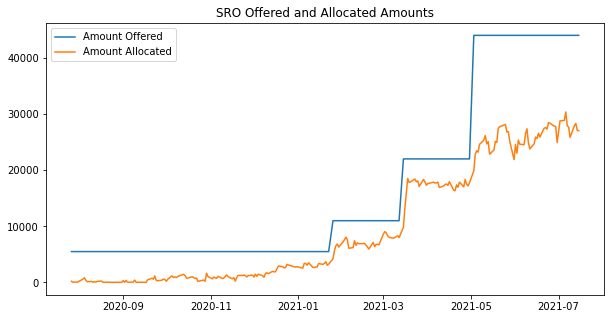

In [223]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro)
plt.title('SRO Offered and Allocated Amounts')
plt.legend(sro)
plt.show()

### SRO Utilization

In [224]:
sro_util=pd.DataFrame()
sro_util['SRO % Utilisation'] = sro['Amount Allocated'] / sro['Amount Offered']
sro_util['5-Day Moving Average'] = sro_util['SRO % Utilisation'].rolling(window=5).mean()
sro_util.tail()

,SRO % Utilisation,5-Day Moving Average
Date,,
2021-07-09,0.587295,0.639336
2021-07-12,0.634227,0.634977
2021-07-13,0.643500,0.625664
2021-07-14,0.614886,0.621586
2021-07-15,0.614227,0.618827


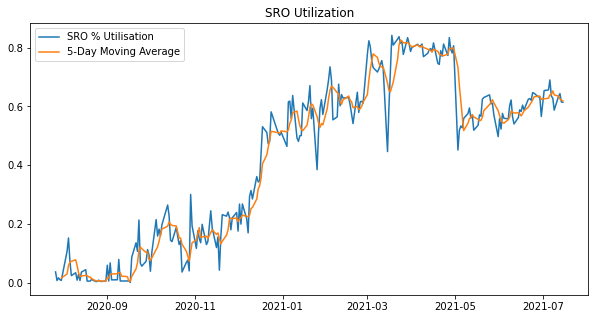

In [225]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro_util)
plt.title('SRO Utilization')
plt.legend(sro_util)
plt.show()

### SRO Max Rate

In [226]:
sro_max_rate = pd.DataFrame()
sro_max_rate=sro_df.drop(columns=['sr_id', 'SR_MATURITY_DATE',
                                  'SR_OFFERED_AMOUNT', 'SR_TOTAL_ALLOCATED_AMOUNT',
                              'SR_ALLOCATED_AMOUNT',
                              'SR_SEC_MATURITY_DATE',
                              'SR_ISIN',
                              'SR_COUPON_RATE',
                              'SR_LOW_REPO_RATE',
                              'SR_AVG_REPO_RATE',
                              'SR_HIGH_REPO_RATE',
                              'SR_SECURITY_TYPE'
                              ]).dropna().sort_values(by='SR_OPERATION_DATE', ascending=True).reset_index()

sro_max_rate=sro_max_rate.rename(columns={'SR_OPERATION_DATE': 'Date', 'SR_MAX_REPO_RATE': 'SRO Max Rate'}).set_index('Date')

sro_max_rate.tail()

,SRO Max Rate
Date,
2021-07-09,0.15
2021-07-12,0.15
2021-07-13,0.15
2021-07-14,0.15
2021-07-15,0.15


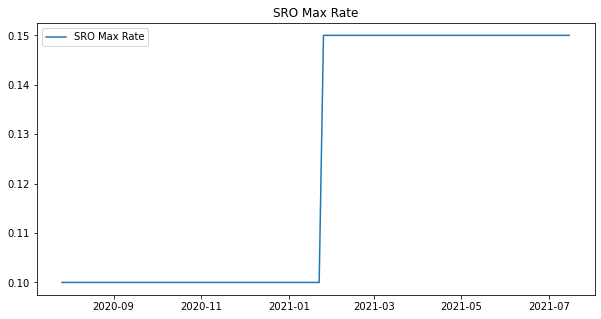

In [227]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(sro_max_rate)
plt.title('SRO Max Rate')
plt.legend(sro_max_rate)
plt.show()

### Max SRO Rate and CORRA

In [228]:
corra_sro = pd.concat([corra_rates, sro_max_rate], axis = 1, join = 'outer')

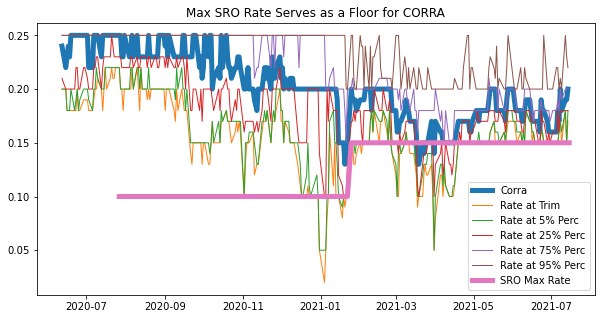

In [229]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(corra_sro['Corra'], linewidth = 5)
plt.plot(corra_sro['Rate at Trim'], linewidth = 1)
plt.plot(corra_sro['Rate at 5% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 25% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 75% Perc'], linewidth = 1)
plt.plot(corra_sro['Rate at 95% Perc'], linewidth = 1)
plt.plot(corra_sro['SRO Max Rate'], linewidth = 5)
plt.title('Max SRO Rate Serves as a Floor for CORRA')
plt.legend(corra_sro)
plt.show()

# 3. Money Market Yields

### Import Data

In [230]:
money_market_df=pd.read_csv(Path("money_market.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 23)

### T-Bill Yields

In [231]:
mm=money_market_df.drop(columns=['CL.CDN.MOST.1DL'])

mm=mm.rename(columns={'AVG.INTWO': 'Corra', 'TB.CDN.30D.MID': '1M T-Bills', 
                      'TB.CDN.60D.MID': '2M T-Bills','TB.CDN.90D.MID': '3M T-Bills',
                      'TB.CDN.180D.MID': '6M T-Bills','TB.CDN.1Y.MID': '1Y T-Bills'})

mm.tail()

,Corra,1M T-Bills,2M T-Bills,3M T-Bills,6M T-Bills,1Y T-Bills
date,,,,,,
2021-07-08,0.20,0.17,0.14,0.14,0.18,0.24
2021-07-09,0.18,0.16,0.13,0.14,0.19,0.24
2021-07-12,0.19,0.17,0.13,0.13,0.17,0.23
2021-07-13,0.19,0.17,0.13,0.14,0.20,0.23
2021-07-14,0.20,0.16,0.14,0.17,0.20,0.28


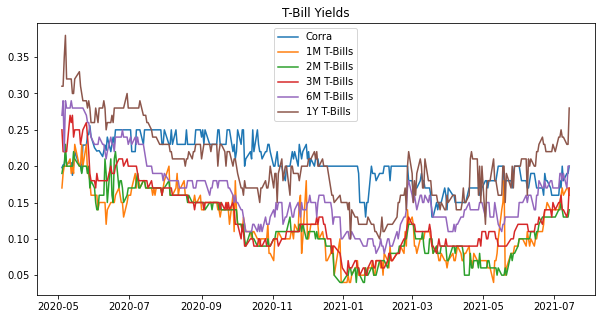

In [232]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(mm.tail(300))
plt.title('T-Bill Yields')
plt.legend(mm)
plt.show()

### O/N Money Market Financing Rate (OMMFR)

In [233]:
onr=money_market_df.drop(columns=['TB.CDN.30D.MID', 
                      'TB.CDN.60D.MID','TB.CDN.90D.MID',
                      'TB.CDN.180D.MID','TB.CDN.1Y.MID'])

onr=onr.rename(columns={'AVG.INTWO': 'Corra', 'CL.CDN.MOST.1DL': 'O/N Money Market Financing Rate'})

onr.tail()

,O/N Money Market Financing Rate,Corra
date,,
2021-07-08,0.2033,0.20
2021-07-09,0.1880,0.18
2021-07-12,0.1960,0.19
2021-07-13,0.1905,0.19
2021-07-14,NaN,0.20


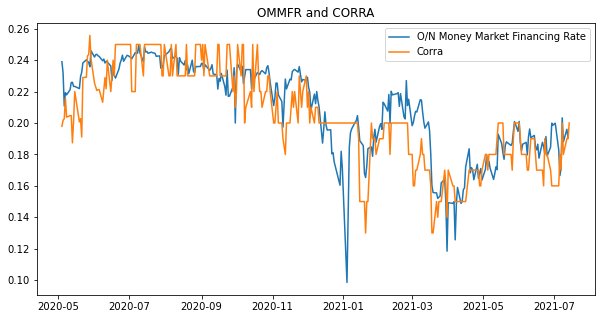

In [234]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(onr.tail(300))
plt.title('OMMFR and CORRA')
plt.legend(onr)
plt.show()

# 4. Goverment of Canada Bond Yields

### Import Data

In [235]:
bond_yields_df=pd.read_csv(Path("bond_yields_all.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 27)

### Benchmark Bond Yields

In [236]:
by=bond_yields_df.drop(columns=['CDN.AVG.1YTO3Y.AVG','CDN.AVG.3YTO5Y.AVG', 'CDN.AVG.5YTO10Y.AVG', 'CDN.AVG.OVER.10.AVG', 'BD.CDN.LONG.DQ.YLD', 'BD.CDN.RRB.DQ.YLD'])

by=by.rename(columns={'BD.CDN.2YR.DQ.YLD': '2Y', 'BD.CDN.3YR.DQ.YLD': '3Y', 
                      'BD.CDN.5YR.DQ.YLD': '5Y','BD.CDN.7YR.DQ.YLD': '7Y',
                      'BD.CDN.10YR.DQ.YLD': '10Y'})

by.tail()

,2Y,3Y,5Y,7Y,10Y
date,,,,,
2021-07-08,0.48,0.65,0.89,1.06,1.26
2021-07-09,0.48,0.66,0.94,1.12,1.32
2021-07-12,0.48,0.65,0.93,1.12,1.32
2021-07-13,0.48,0.67,0.95,1.14,1.34
2021-07-14,0.45,0.64,0.91,1.09,1.29


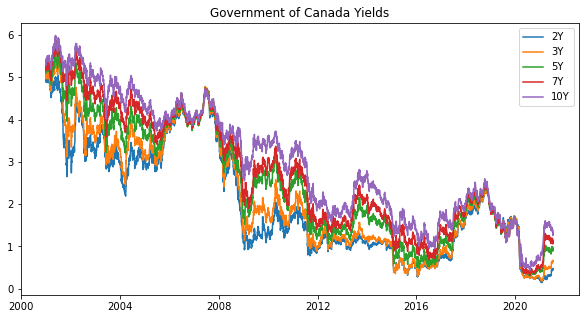

In [237]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(by)
plt.title('Government of Canada Yields')
plt.legend(by)
plt.show()

### Government of Canada Yield Spreads

In [238]:
curve = pd.DataFrame()
curve['2Y-10Y'] = by['10Y'] - by['2Y']
curve['2Y-5Y'] = by['5Y'] - by['2Y']
curve['5Y-10Y'] = by['10Y'] - by['5Y']
curve.tail()

,2Y-10Y,2Y-5Y,5Y-10Y
date,,,
2021-07-08,0.78,0.41,0.37
2021-07-09,0.84,0.46,0.38
2021-07-12,0.84,0.45,0.39
2021-07-13,0.86,0.47,0.39
2021-07-14,0.84,0.46,0.38


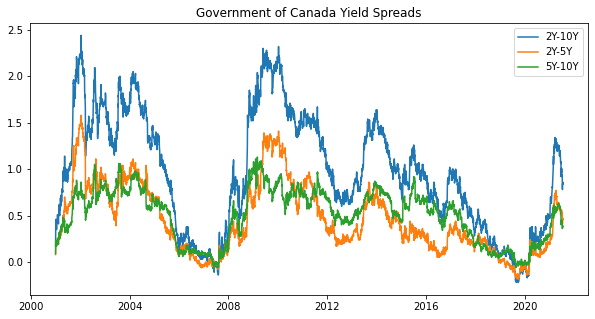

In [239]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(curve)
plt.title('Government of Canada Yield Spreads')
plt.legend(curve)
plt.show()

# 5. FX Rates

# Import Data

In [240]:
fx_rates_df=pd.read_csv(Path("FX_RATES_DAILY-sd-2017-01-03.csv"), index_col = "date", infer_datetime_format=True, parse_dates=True, skiprows = 39)
fx_rates_df.tail()

,FXAUDCAD,FXBRLCAD,FXCNYCAD,FXEURCAD,FXHKDCAD,FXINRCAD,FXIDRCAD,FXJPYCAD,FXMYRCAD,FXMXNCAD,...,FXZARCAD,FXKRWCAD,FXSEKCAD,FXCHFCAD,FXTWDCAD,FXTHBCAD,FXTRYCAD,FXGBPCAD,FXUSDCAD,FXVNDCAD
date,,,,,,,,,,,,,,,,,,,,,
2021-07-09,0.9333,0.2372,0.1926,1.4806,0.1606,0.01674,0.000086,0.01133,NaN,0.06276,...,0.08756,0.001090,0.1454,1.3637,0.04457,NaN,0.1440,1.7290,1.2476,NaN
2021-07-12,0.9326,0.2394,0.1926,1.4789,0.1606,0.01672,0.000086,0.01131,NaN,0.06275,...,0.08650,0.001088,0.1453,1.3624,0.04453,NaN,0.1444,1.7304,1.2471,NaN
2021-07-13,0.9331,0.2419,0.1934,1.4773,0.1611,0.01678,0.000087,0.01133,NaN,0.06250,...,0.08541,0.001090,0.1449,1.3636,0.04466,NaN,0.1454,1.7307,1.2514,NaN
2021-07-14,0.9343,0.2455,0.1933,1.4778,0.1609,0.01677,0.000086,0.01135,NaN,0.06279,...,0.08584,0.001090,0.1449,1.3648,0.04464,NaN,0.1454,1.7327,1.2497,NaN
2021-07-15,0.9342,0.2461,0.1946,1.4847,0.1619,0.01687,0.000087,0.01143,NaN,0.06301,...,0.08632,0.001101,0.1450,1.3694,0.04502,NaN,0.1467,1.7396,1.2572,NaN


### Selected FX Rates vs Canadian Dollar

### USDCAD

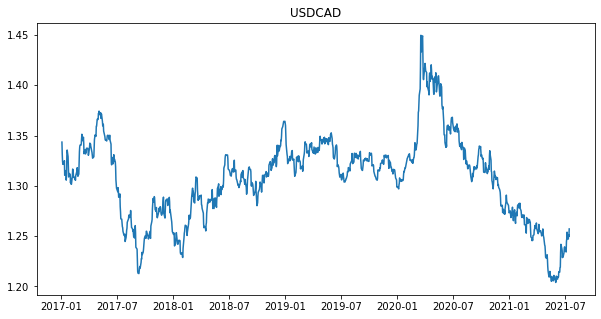

In [241]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXUSDCAD'])
plt.title('USDCAD')
plt.show()

### AUDCAD

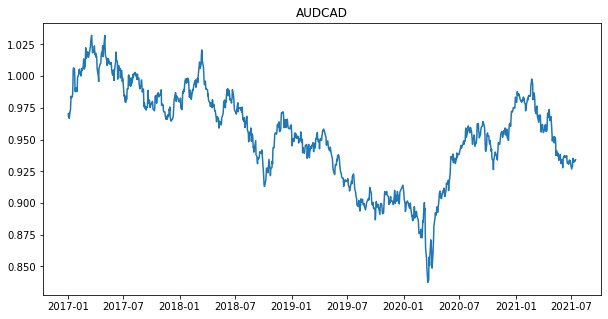

In [242]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXAUDCAD'])
plt.title('AUDCAD')
plt.show()

### EURCAD

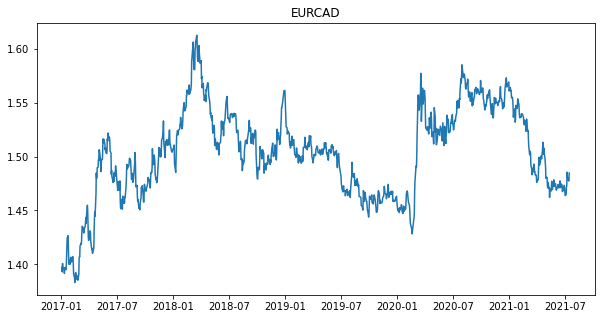

In [243]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXEURCAD'])
plt.title('EURCAD')
plt.show()

### GBPCAD

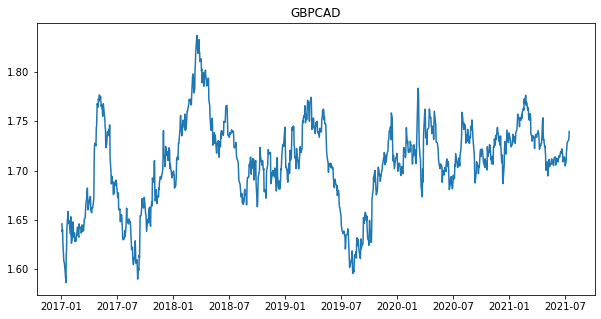

In [244]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXGBPCAD'])
plt.title('GBPCAD')
plt.show()

### JPYCAD

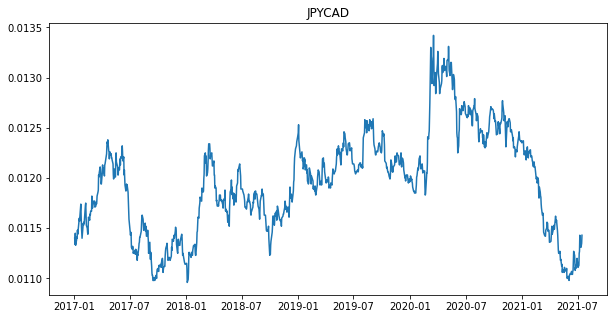

In [245]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXJPYCAD'])
plt.title('JPYCAD')
plt.show()

### NZDCAD

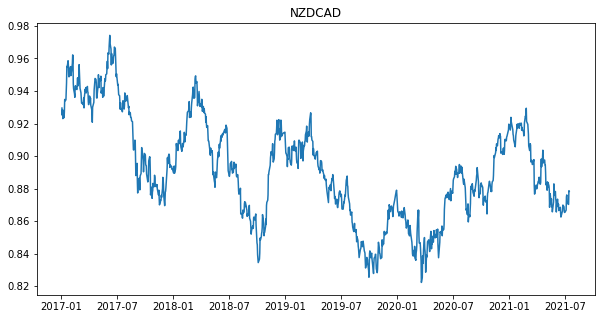

In [246]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_rates_df['FXNZDCAD'])
plt.title('NZDCAD')
plt.show()

### Selected FX Rates vs US Dollar

In [247]:
fx_vs_usd=pd.DataFrame()
fx_vs_usd['AUDUSD'] = fx_rates_df['FXAUDCAD'] / fx_rates_df['FXUSDCAD']
fx_vs_usd['EURUSD'] = fx_rates_df['FXEURCAD'] / fx_rates_df['FXUSDCAD']
fx_vs_usd['GBPUSD'] = fx_rates_df['FXGBPCAD'] / fx_rates_df['FXUSDCAD']
fx_vs_usd['USDJPY'] = fx_rates_df['FXUSDCAD'] / fx_rates_df['FXJPYCAD']
fx_vs_usd['NZDUSD'] = fx_rates_df['FXNZDCAD'] / fx_rates_df['FXUSDCAD']
fx_vs_usd.tail()

,AUDUSD,EURUSD,GBPUSD,USDJPY,NZDUSD
date,,,,,
2021-07-09,0.748076,1.186759,1.385861,110.114740,0.698862
2021-07-12,0.747815,1.185871,1.387539,110.265252,0.697859
2021-07-13,0.745645,1.180518,1.383011,110.450132,0.695461
2021-07-14,0.747619,1.182524,1.386493,110.105727,0.703129
2021-07-15,0.743080,1.180958,1.383710,109.991251,0.698616


### AUDUSD 

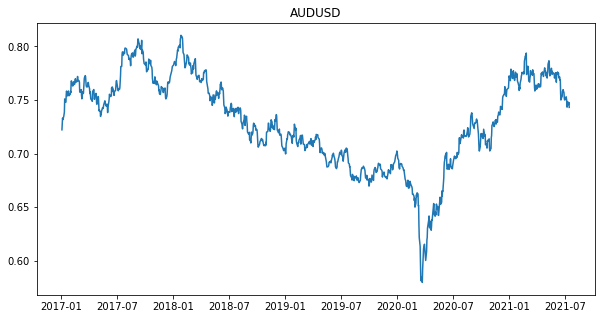

In [248]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['AUDUSD'])
plt.title('AUDUSD')
plt.show()

### EURUSD

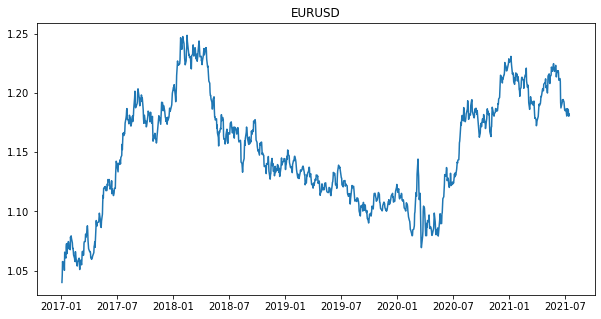

In [249]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['EURUSD'])
plt.title('EURUSD')
plt.show()

### GBPUSD

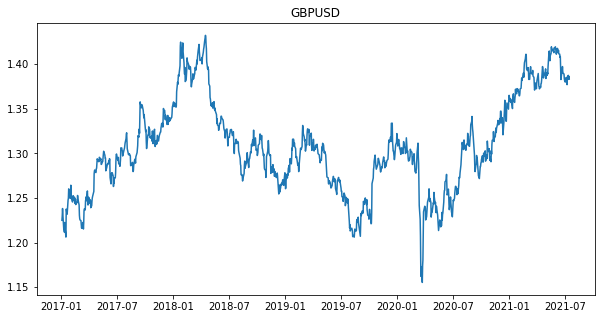

In [250]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['GBPUSD'])
plt.title('GBPUSD')
plt.show()

### USDJPY

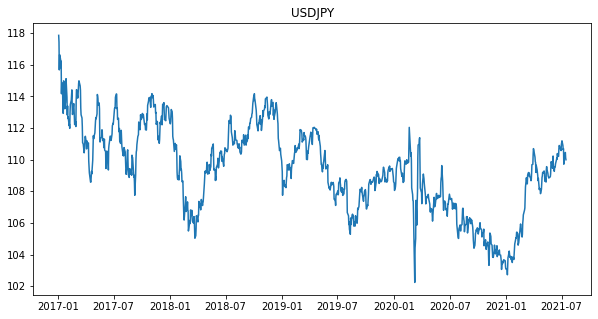

In [251]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['USDJPY'])
plt.title('USDJPY')
plt.show()

### NZDUSD

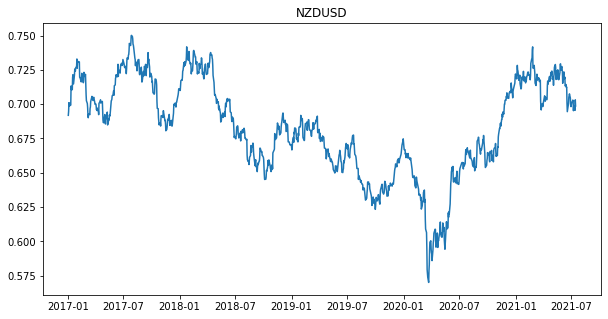

In [252]:
plt.figure(figsize=(10,5))
ax = plt.axes()
plt.plot(fx_vs_usd['NZDUSD'])
plt.title('NZDUSD')
plt.show()